<div style="width:100%;text-align: center;"> <img align=middle src="https://www.crmsoftwareblog.com/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/sales-forecast-webinar-image-1-625x417.jpeg.webp"> </div>

# <h1 style='background:#094074; border:0; color:white'><center> 🚀EDA: Sales Forecasting</center></h1> 

# **<span style="color:#094074;">⚙EDA Process</span>**

> 1. Importing a dataset

> 2. Understanding the big picture

> 3. Preparation / Data Cleaning

> 4. Understanding and exploring Data

> 5. Study of the relationships between variables

> 6. Plotting Data to infer results

> 7. Conclusion

# **<span style="color:#FE9000;">📰Problem Statement</span>**
<h2><b>Primary objective :</b></h2>
Generate accurate predictions of future sales to facilitate effective business planning, inventory management, and resource allocation.
<h2><b>Secondary Objectives :</b></h2>

1. Identify and analyze key drivers influencing sales, including seasonality, promotions, economic factors, and external events, to enhance forecasting accuracy.
2. Ensure timely forecasting to provide the business with actionable insights well in advance for proactive decision-making.
3. Build robust forecasting models capable of adapting to changes in market conditions, maintaining accuracy over time.
4. Enhance interpretability of the models to provide stakeholders with insights into the factors contributing to sales predictions.
5. Implement forecasting models in a user-friendly manner</b></h2> to enable stakeholders with varying technical expertise to understand and utilize the results effectively.

# **<span style="color:#FE9000;">📁Dataset Details</span>**

This dataset has 18 columns, namely:
Dataset Columns:

1. Row ID : 'Unique Order ID for each Customer'
2. Order ID: 'Unique ID for each row',
3. Order Date: 'Order Date of the product',
4. Ship Date: 'Shipping Date of the Product',
5. Ship Mode: 'Shipping Mode specified by the Customer',
6. Customer ID: 'Unique ID to identify each Customer',
7. Customer Name: 'Name of the Customer',
8. Segment: 'The segment where the Customer belongs',
9. Country: 'Country of residence of the Customer',
10. City: 'City of residence of of the Customer',
11. State: 'State of residence of the Customer',
12. Postal Code: 'Postal Code of every Customer',
13. Region: 'Region where the Customer belong',
14. Product ID: 'Unique ID of the Product',
15. Category: 'Category of the product ordered',
16. Sub-Category: 'Sub-Category of the product ordered',
17. Product Name: 'Name of the Product',
18. Sales: 'Sales of the Product'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **<span style="color:#FE0000;">Dataset Loading</span>**

In [2]:
df = pd.read_csv('Sales Forecast.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.shape

(9800, 18)

# **<span style="color:#FFDD4A;">🧹 Data Cleaning</span>**

### Dropping Column ID because its statistically insignificant

In [7]:
unnecessery_columns = ['Row ID' , 'Order ID' , 'Product ID' , 'Customer Name']
df = df.drop(unnecessery_columns,axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9800 non-null   object 
 1   Ship Date     9800 non-null   object 
 2   Ship Mode     9800 non-null   object 
 3   Customer ID   9800 non-null   object 
 4   Segment       9800 non-null   object 
 5   Country       9800 non-null   object 
 6   City          9800 non-null   object 
 7   State         9800 non-null   object 
 8   Postal Code   9789 non-null   float64
 9   Region        9800 non-null   object 
 10  Category      9800 non-null   object 
 11  Sub-Category  9800 non-null   object 
 12  Product Name  9800 non-null   object 
 13  Sales         9800 non-null   float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


### Checking for Missing Values

In [9]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### Only Postal Code has missing values

### Checking for Duplicate Values

In [10]:
df[df.duplicated()]

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,43229.0,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


### Removing Duplicate Records

In [11]:
df = df.drop_duplicates()
df.shape

(9799, 14)

### Handling Missing Values

In [12]:
df.loc[df["Postal Code"].isna(),['Country','City','State','Postal Code']]

,Country,City,State,Postal Code
2234,United States,Burlington,Vermont,NaN
5274,United States,Burlington,Vermont,NaN
8798,United States,Burlington,Vermont,NaN
9146,United States,Burlington,Vermont,NaN
9147,United States,Burlington,Vermont,NaN
9148,United States,Burlington,Vermont,NaN
9386,United States,Burlington,Vermont,NaN
9387,United States,Burlington,Vermont,NaN
9388,United States,Burlington,Vermont,NaN
9389,United States,Burlington,Vermont,NaN


#### Searched online and manually putting the Zip code to 5401

In [13]:
df['Postal Code'].fillna('5401',inplace=True)

In [14]:
df.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
dtype: int64

#### Missing Values and Duplicate Records Handled

### Numerical and Categorical column identification

In [15]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['Sales']
Categorical Columns : ['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product Name']


In [16]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Statistical Overview of Numerical columns

In [17]:
df.describe()

,Sales
count,9799.000000
mean,230.763895
std,626.683644
min,0.444000
25%,17.248000
50%,54.480000
75%,210.572000
max,22638.480000


### Statistical Overview of Categorical columns

In [18]:
df[categorical_columns].describe()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name
count,9799,9799,9799,9799,9799,9799,9799,9799,9799.0,9799,9799,9799,9799
unique,1230,1326,4,793,3,1,529,49,627.0,4,3,17,1849
top,05/09/2017,26/09/2018,Standard Class,WB-21850,Consumer,United States,New York City,California,10035.0,West,Office Supplies,Binders,Staple envelope
freq,38,34,5858,35,5101,9799,891,1946,253.0,3140,5909,1492,47


### Convert Order date and ship date dtype object to datetime and Postal Code float to int

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')  
df['Postal Code'] = df['Postal Code'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9799 non-null   datetime64[ns]
 1   Ship Date     9799 non-null   datetime64[ns]
 2   Ship Mode     9799 non-null   object        
 3   Customer ID   9799 non-null   object        
 4   Segment       9799 non-null   object        
 5   Country       9799 non-null   object        
 6   City          9799 non-null   object        
 7   State         9799 non-null   object        
 8   Postal Code   9799 non-null   int32         
 9   Region        9799 non-null   object        
 10  Category      9799 non-null   object        
 11  Sub-Category  9799 non-null   object        
 12  Product Name  9799 non-null   object        
 13  Sales         9799 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int32(1), object(10)
memory usage: 1.1+ MB


### Seperating Data columns to Day , Month and Year format for both Order date and Shipping Date

In [21]:
df.insert(loc=4,  column='order_month_year',value=df['Order Date'].dt.to_period('M'))
df.insert(loc=5, column='ship_month_year', value=df['Ship Date'].dt.to_period('M'))

df.insert(loc=6, column='order_day', value=df['Order Date'].dt.day)
df.insert(loc=7, column='order_month', value=df['Order Date'].dt.month)
df.insert(loc=8, column='order_year', value=df['Order Date'].dt.year)

df.insert(loc=9, column='ship_day', value=df['Ship Date'].dt.day)
df.insert(loc=10, column='ship_month', value=df['Ship Date'].dt.month)
df.insert(loc=11, column='ship_year', value=df['Ship Date'].dt.year)

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,order_month_year,ship_month_year,order_day,order_month,order_year,ship_day,ship_month,ship_year,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,CG-12520,2017-11,2017-11,8,11,2017,11,11,2017,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,CG-12520,2017-11,2017-11,8,11,2017,11,11,2017,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,DV-13045,2017-06,2017-06,12,6,2017,16,6,2017,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,SO-20335,2016-10,2016-10,11,10,2016,18,10,2016,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,SO-20335,2016-10,2016-10,11,10,2016,18,10,2016,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        9799 non-null   datetime64[ns]
 1   Ship Date         9799 non-null   datetime64[ns]
 2   Ship Mode         9799 non-null   object        
 3   Customer ID       9799 non-null   object        
 4   order_month_year  9799 non-null   period[M]     
 5   ship_month_year   9799 non-null   period[M]     
 6   order_day         9799 non-null   int64         
 7   order_month       9799 non-null   int64         
 8   order_year        9799 non-null   int64         
 9   ship_day          9799 non-null   int64         
 10  ship_month        9799 non-null   int64         
 11  ship_year         9799 non-null   int64         
 12  Segment           9799 non-null   object        
 13  Country           9799 non-null   object        
 14  City              9799 n

## Univariate Analysis

#### 1. Numerical Columns

### Sales

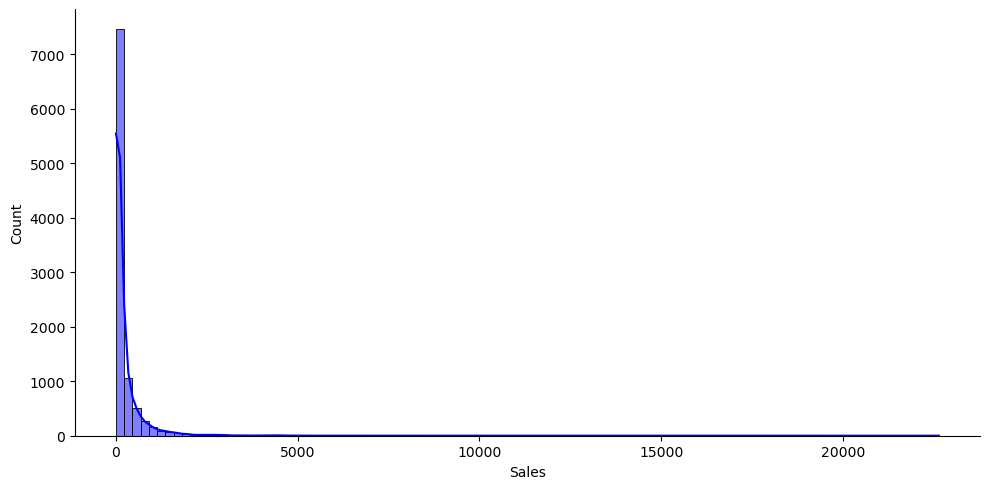

In [25]:
sns.displot(df['Sales'],kde=True,aspect=2,color='blue',bins=100);

**<span style="color:#790252;"> Observations : <br>
    Approx Product Sales are 12K to 26K<br></span>**

<Axes: >

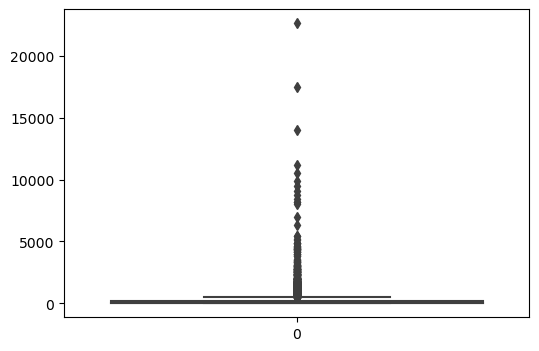

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(df['Sales'])

#### 2. Categorical Columns

### Ship Mode

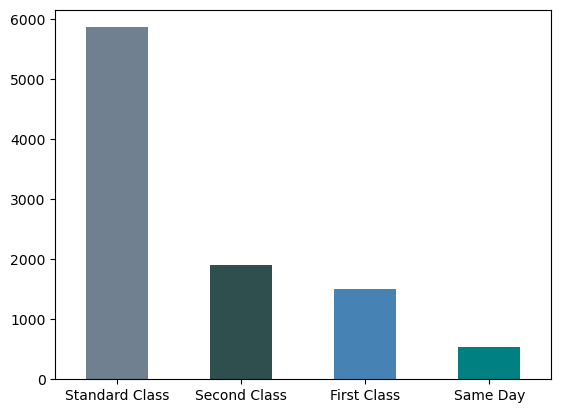

In [27]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']

df['Ship Mode'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=360);

**<span style="color:#790252;"> Observations : <br>
    5859 orders were shipped by Standrad Class ship mode<br></span>**

### Segment

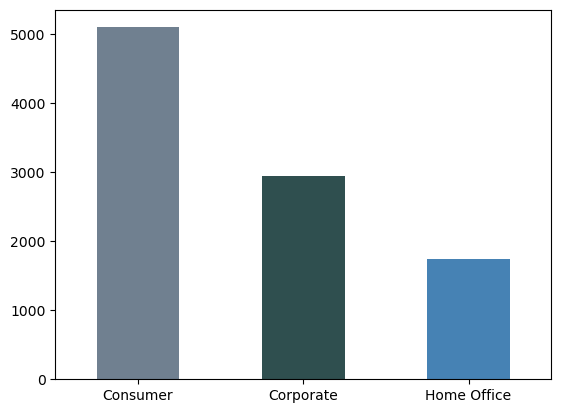

In [28]:
df['Segment'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=360);

**<span style="color:#790252;"> Observations : <br>
    Approx 52% of segments for product sales was Consumers<br></span>**

### State

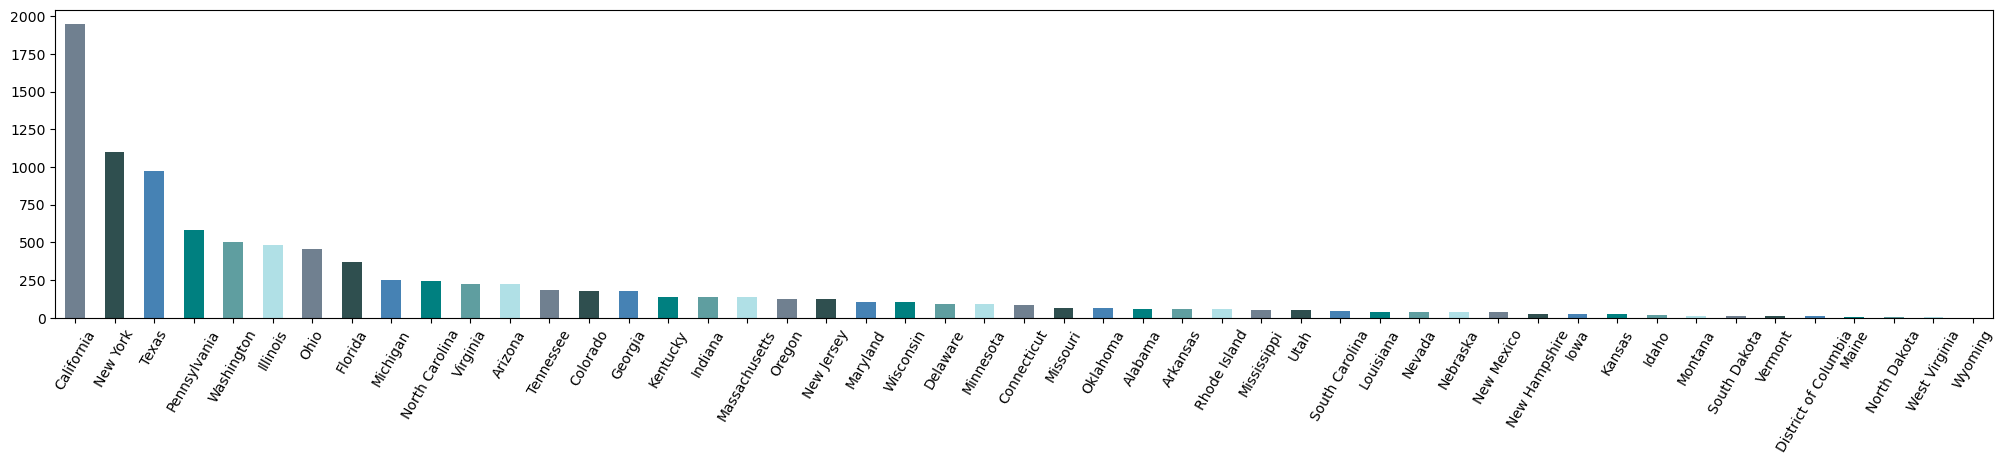

In [29]:
plt.figure(figsize=(25,4))
df['State'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=60);

**<span style="color:#790252;"> Observations : <br>
    Approx 20% order was placed by State California<br></span>**

### City

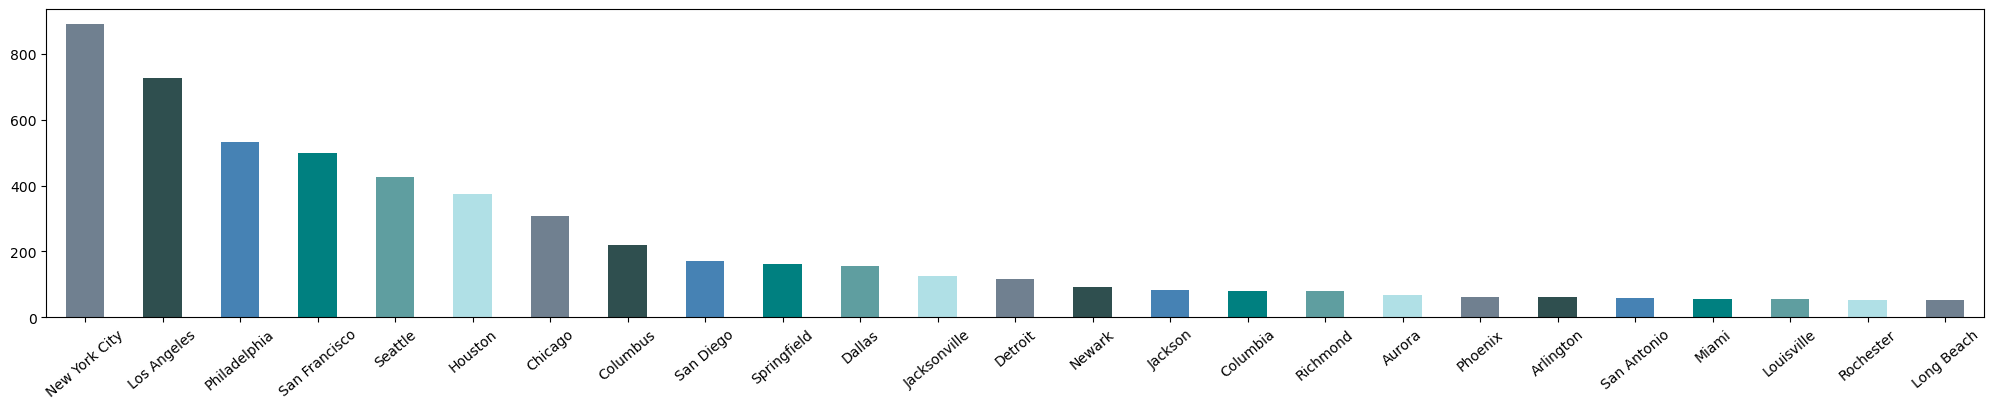

In [30]:
plt.figure(figsize=(25,4))
df['City'].value_counts().head(25).plot.bar(color = color_list)
plt.xticks(rotation=40);

**<span style="color:#790252;"> Observations : <br>
    New York City citizen were contributing approx 9% in overall product sales<br></span>**

### Region

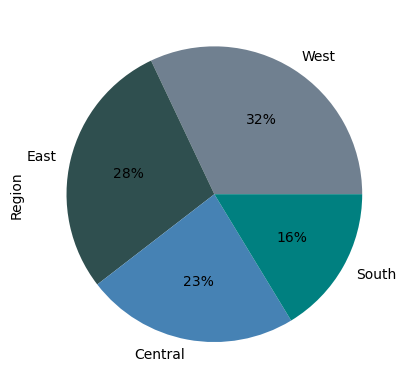

In [31]:
df['Region'].value_counts().plot.pie(subplots=True,autopct='%1.0f%%',colors=color_list);

**<span style="color:#790252;"> Observations : <br>
    32% customers are Western Region of United State where as 16% are from Southern Region<br></span>**

### Category

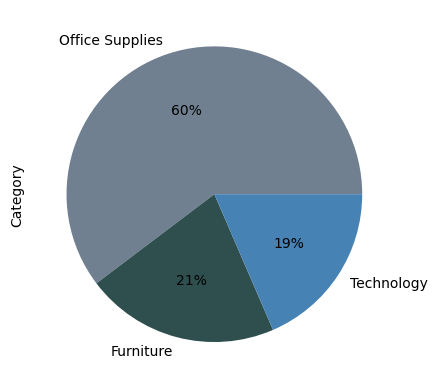

In [32]:
df['Category'].value_counts().plot.pie(subplots=True,autopct='%1.0f%%',colors=color_list);

**<span style="color:#790252;"> Observations : <br>
    60% of product was sale are belongs to Office Supplies Category<br></span>**

### Sub Category

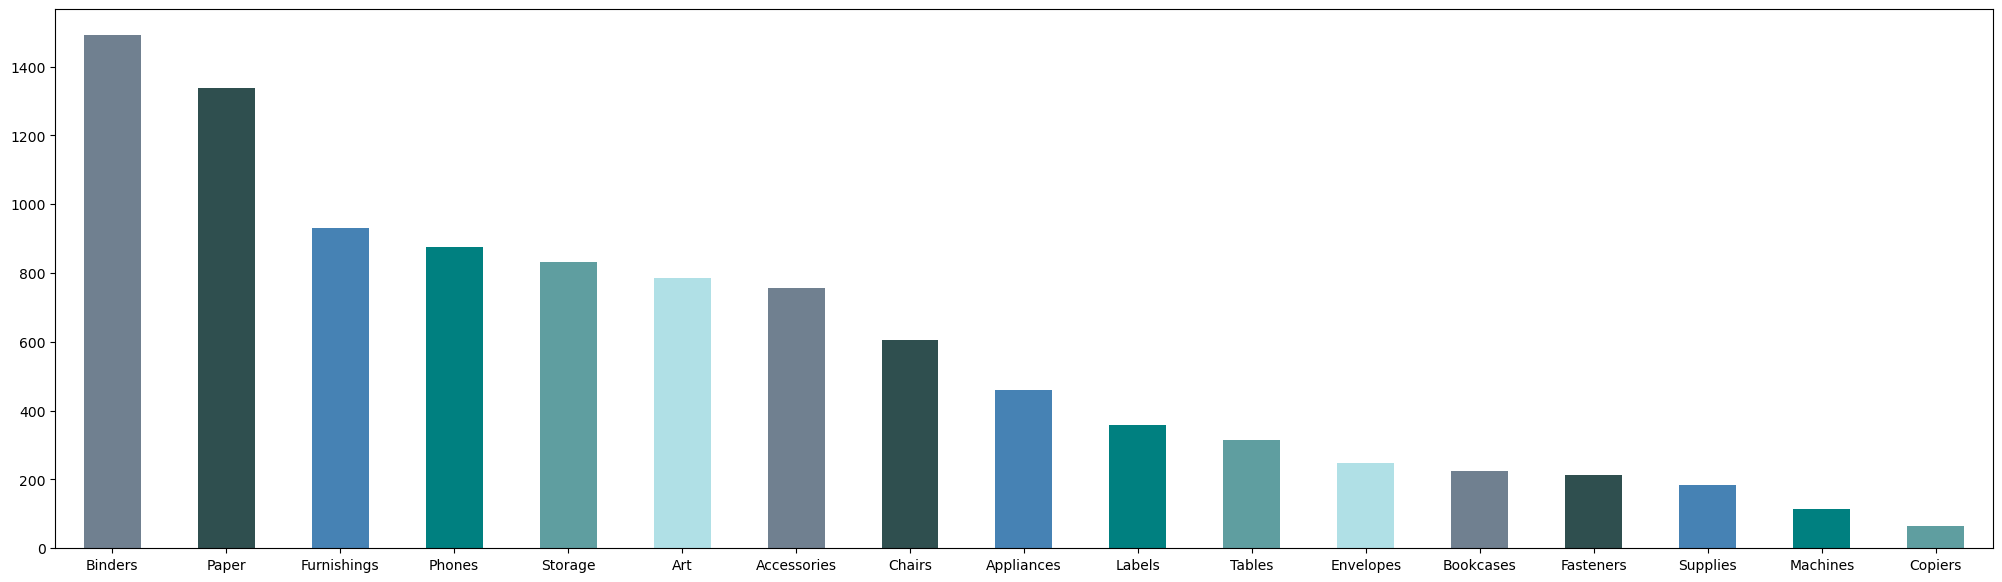

In [33]:
plt.figure(figsize=(25,7))
df['Sub-Category'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=360);

**<span style="color:#790252;"> Observations : <br>
    In overall sub-category approx 15% are Binders<br></span>**

### Product Name

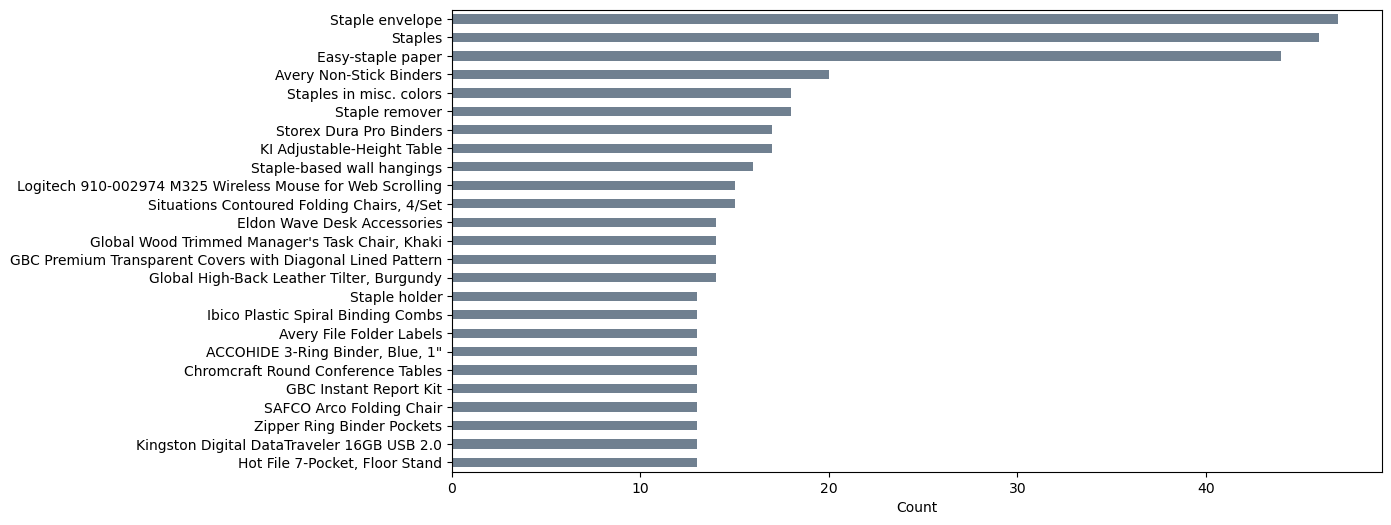

In [34]:
plt.figure(figsize=(12,6))
df['Product Name'].value_counts().head(25).sort_values().plot.barh(color = 'Slategrey')
plt.xlabel('Count');

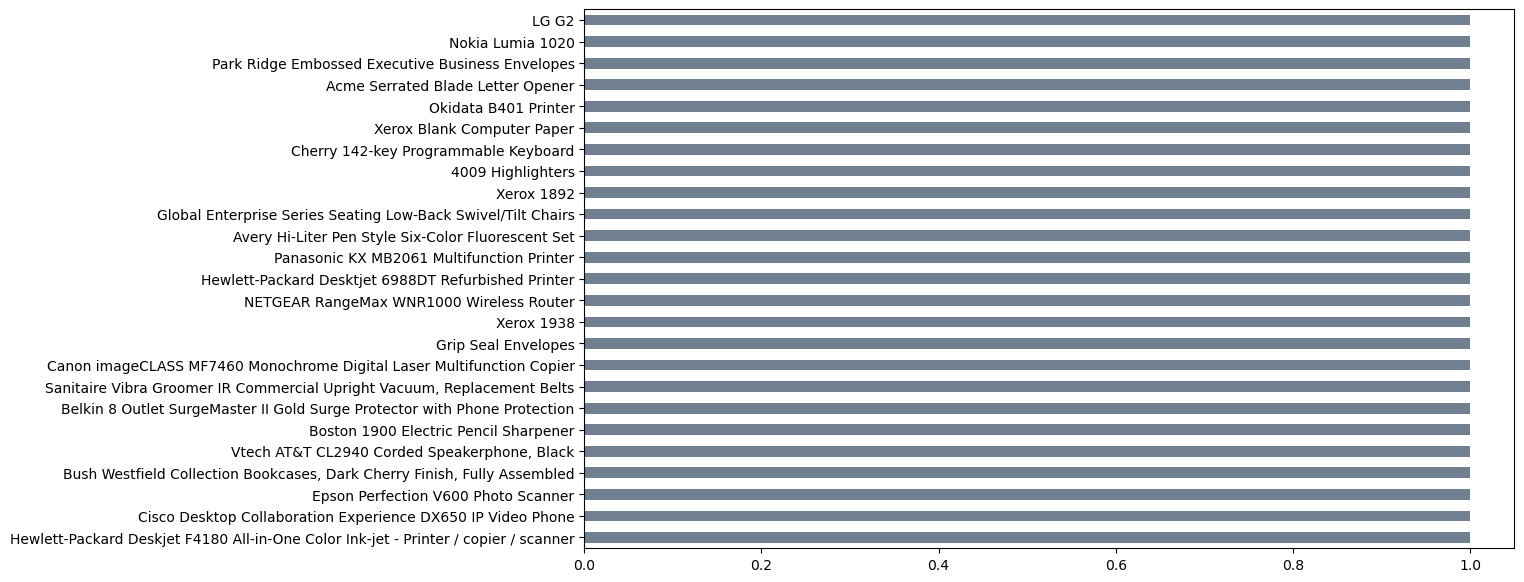

In [35]:
plt.figure(figsize=(12,7))
df['Product Name'].value_counts().sort_values(ascending=False).tail(25).plot.barh(color = 'Slategrey');

**<span style="color:#790252;"> Observations : <br>
    1. Staple envelope, Staples, Easy-staple paper are most ordered product<br>
    2. Xiaomi Mi3, Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream, Socket Bluetooth Cordless Hand Scanner (CHS), Logitech Illuminated Ultrathin Keyboard with Backlighting, LG G2 are less orderd product</span>**|

### Shipping Days

Text(0.5, 0, 'count')

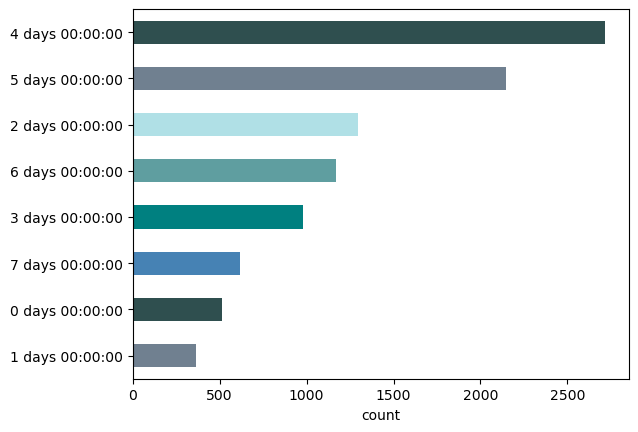

In [36]:
df['Shipping_days'] = df['Ship Date'] - df['Order Date']
time_taken = df['Shipping_days'].value_counts().sort_values().plot.barh(color=color_list)
plt.xlabel('count')

**<span style="color:#790252;"> Observations : <br>
    The Maximum days taken for the shipping after order was placed is for 4 days<br></span>**

## Bivariate Analysis

### Customer ID vs Sales

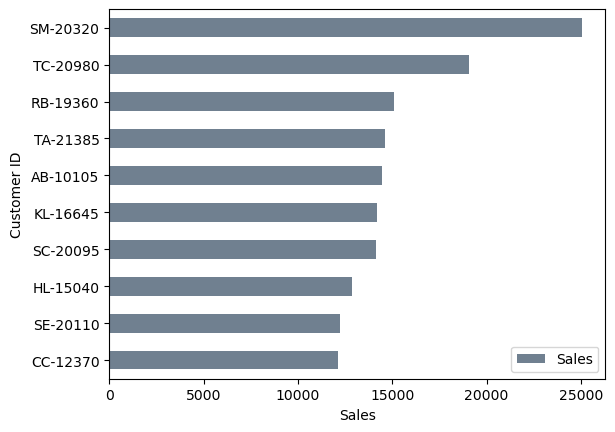

In [37]:
top_customer = df.groupby("Customer ID").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).head(10).plot.barh(color= color_list)
plt.gca().invert_yaxis()
plt.xlabel('Sales');

**<span style="color:#790252;"> Observations : <br>
    Here the top 10 Customer who bought the product maybe at high amount or product which have high cost here Customer ID SM-20320 is on top<br></span>**

### State vs Sales

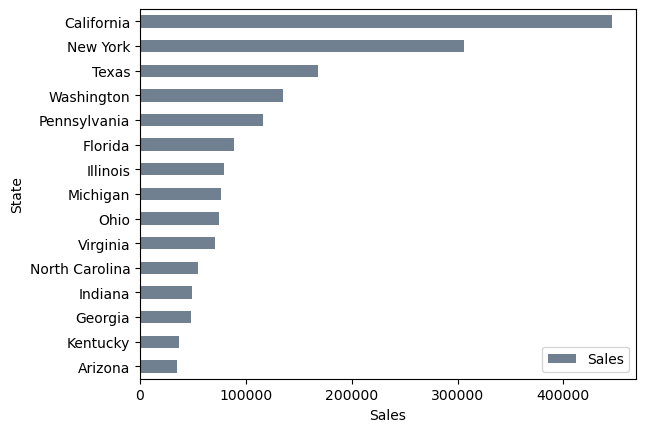

In [38]:
top_States= df.groupby("State").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).head(15).plot.barh(color= color_list)
plt.gca().invert_yaxis()
plt.xlabel('Sales');

**<span style="color:#790252;"> Observations : <br>
    Above chart shows top 15 States from which California is the on the top in terms of the Sales<br></span>**

### City vs Sales

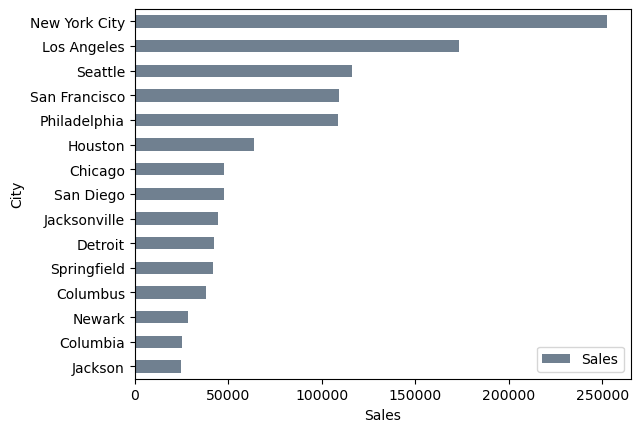

In [39]:
top_cities= df.groupby("City").agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).head(15).plot.barh(color='slategray')
plt.gca().invert_yaxis()
plt.xlabel('Sales');

**<span style="color:#790252;"> Observations : <br>
    1. The above bar chart shows top 15 cities out of 529 cities based on their Sales<br>
	2. Most of the sales are done by New York City<br></span>**

### Distribution of Sales citywise across the highest Sales recorded State i.e California

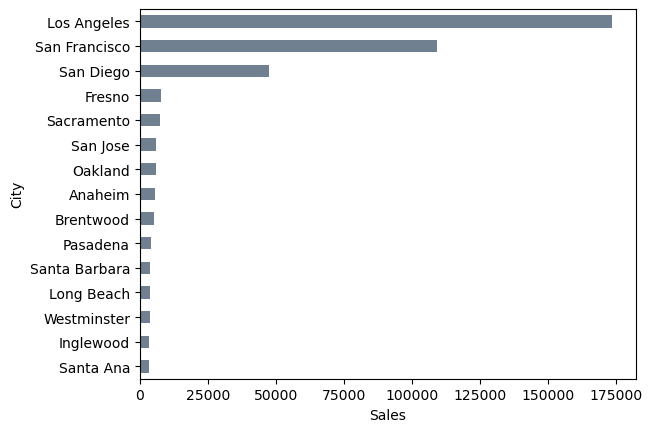

In [40]:
df.loc[df['State']=='California',['City','Sales']].groupby('City')['Sales'].sum().sort_values(ascending= False).head(15).plot.barh(color='Slategray');
plt.gca().invert_yaxis()
plt.xlabel('Sales');

**<span style="color:#790252;"> Observations : <br>
    1. As we saw in above bar chart California State is having most Sales so lets have look which cities are contributed to it.<br>
	2. Out of 80 cities in California here are top 15 cites from which Los Angeles have most sales.<br></span>**

### Shipping Mode vs Sales

array([<Axes: ylabel='Sales'>], dtype=object)

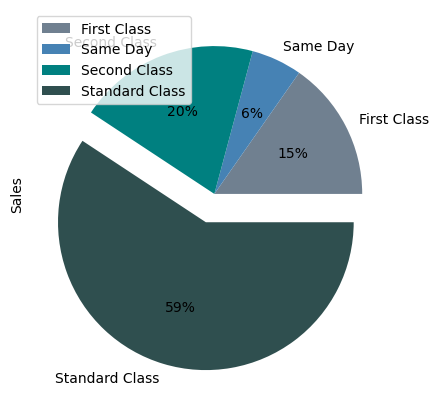

In [41]:
df.groupby("Ship Mode").agg({'Sales':sum}).plot.pie(subplots=True, explode = [0,0,0,0.2],autopct='%1.0f%%',colors=['slategray','steelblue','teal','darkslategray'])

**<span style="color:#790252;"> Observations : <br>
    59% Standard Class ship mode are used, or we can say Standard Class ship mode is on high demand<br></span>**

### Segment vs Sales

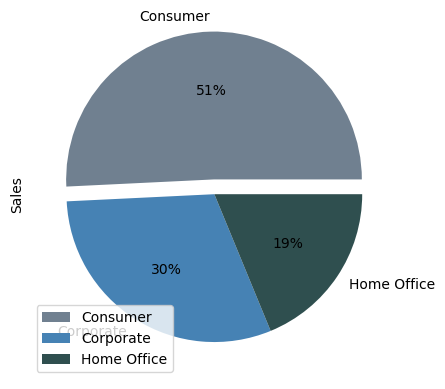

In [42]:
df.groupby('Segment').agg({'Sales':sum}).plot.pie(subplots=True, explode = [0.1,0,0],autopct='%1.0f%%',colors=['slategray','steelblue','darkslategray']);

**<span style="color:#790252;"> Observations : <br>
    51% of the sales was from Consumer<br></span>**

### Region vs Sales

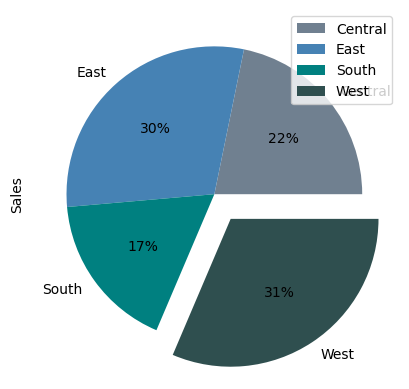

In [43]:
df.groupby('Region').agg({'Sales':sum}).plot.pie(subplots=True, explode = [0,0,0,0.2],autopct='%1.0f%%',colors=['slategray','steelblue','teal','darkslategray']);

**<span style="color:#790252;"> Observations : <br>
    West region gave 31% of product order<br></span>**

### Product Category vs Sales

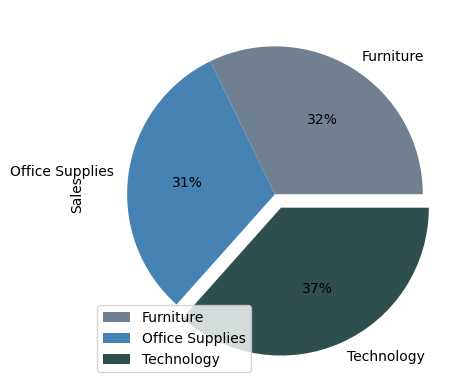

In [44]:
df.groupby('Category').agg({'Sales':sum}).plot.pie(subplots=True, explode = [0,0,0.1],autopct='%1.0f%%',colors=['slategray','steelblue','darkslategray']);

**<span style="color:#790252;"> Observations : <br>
    37% of the product sales price was from Technological product<br></span>**

### Subcategories vs Sales

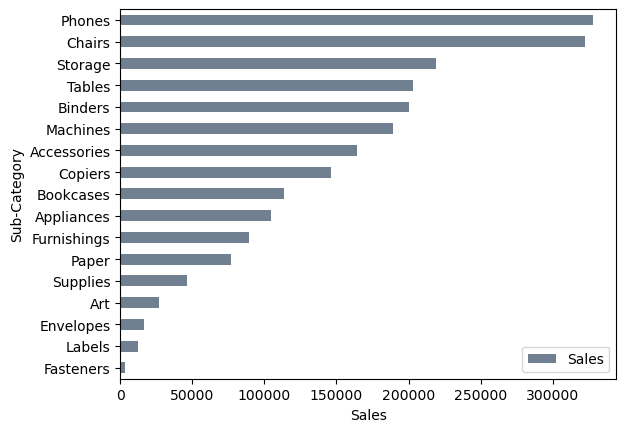

In [45]:
df.groupby('Sub-Category').agg({'Sales':sum}).sort_values(by= "Sales",ascending=False).round(2).plot.barh(color='slategray');
plt.gca().invert_yaxis()
plt.xlabel('Sales');

**<span style="color:#790252;"> Observations : <br>
    Phones are the top demanded product in sub-category<br></span>**

### Modelwise distribution of Sales for the highest sold Product i.e Phones

Text(0.5, 0, 'Sales')

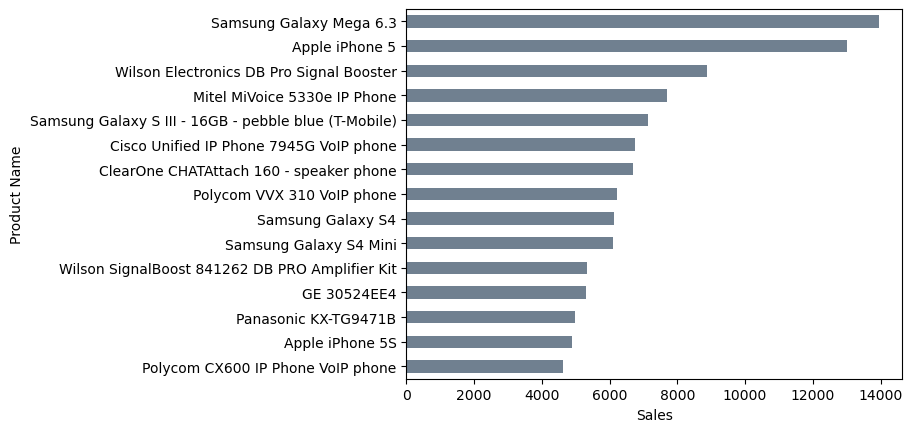

In [46]:
df.loc[df['Sub-Category']=='Phones',['Product Name','Sales']].groupby('Product Name')['Sales'].sum().sort_values(ascending= False).head(15).plot.barh(color='Slategray');
plt.gca().invert_yaxis()
plt.xlabel('Sales')

**<span style="color:#790252;"> Observations : <br>
    Here we can say Samsung Galaxy Mega 6.3 was not most ordered product but still it contributed more in selling price of the product<br></span>**

### Top Product Names for each sub category

In [47]:
df['rank'] =df.groupby(['Sub-Category'])['Sales'].rank('dense',ascending=False)
pd.DataFrame(df.loc[df['rank']==1,['Sub-Category', 'Product Name']].values,columns=['Sub-Category','Top Product name from each Sub-Category'])

,Sub-Category,Top Product name from each Sub-Category
0,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...
1,Accessories,Logitech P710e Mobile Speakerphone
2,Labels,"Dot Matrix Printer Tape Reel Labels, White, 50..."
3,Phones,Apple iPhone 5
4,Supplies,High Speed Automatic Electric Letter Opener
5,Envelopes,Ames Color-File Green Diamond Border X-ray Mai...
6,Machines,Cisco TelePresence System EX90 Videoconferenci...
7,Storage,Smead Adjustable Mobile File Trolley with Lock...
8,Paper,Xerox 1941
9,Copiers,Canon imageCLASS 2200 Advanced Copier


### Datewise distribution of Sales

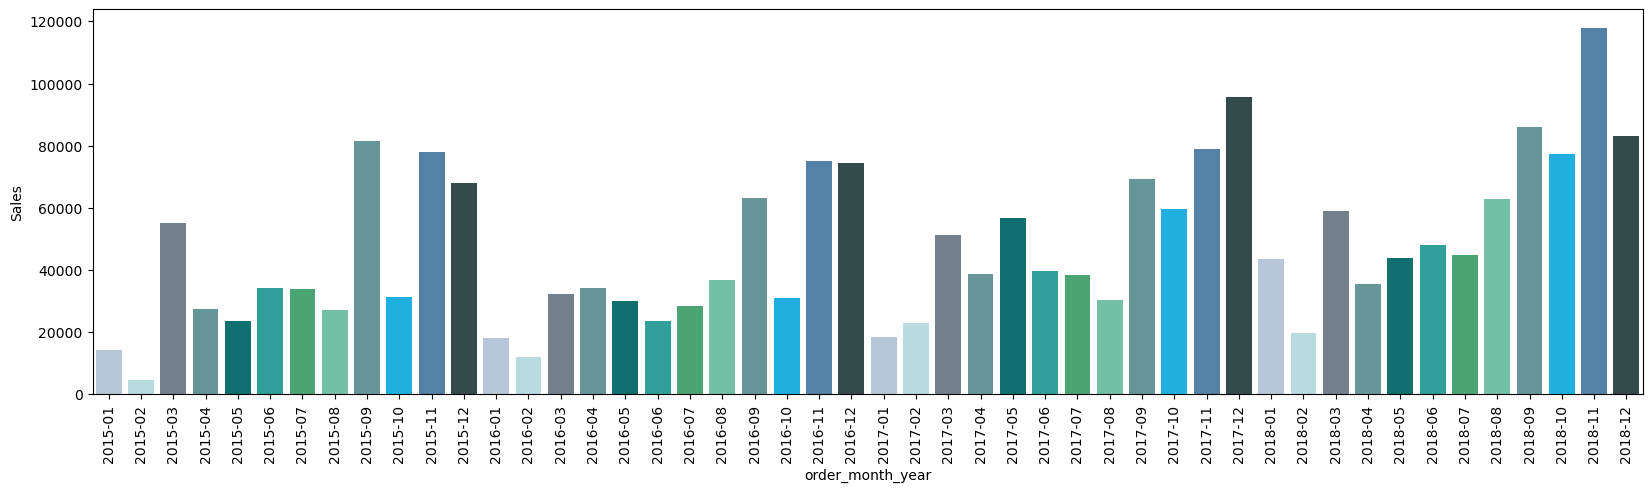

In [48]:
color_month = ['lightsteelblue','powderblue','slategray','cadetblue', 'teal', 'lightseagreen',
             'mediumseagreen','mediumaquamarine','cadetblue','deepskyblue', 'steelblue','darkslategray']

monthly_sales = pd.DataFrame(df.groupby('order_month_year')['Sales'].sum()).reset_index()
plt.figure(figsize=(20, 5))
sns.barplot(x = 'order_month_year', y = 'Sales',data = monthly_sales,palette=color_month)
plt.xticks(rotation=90)
plt.show()

**<span style="color:#790252;"> Observations : <br>
    1. From the above plot we can say that in every year September, November and December were the months having most sales<br>
	2. Let's check the same with the product category.<br></span>**

### Year segregated Datewise distribution of Sales for Top Sold Products

<Figure size 800x600 with 0 Axes>

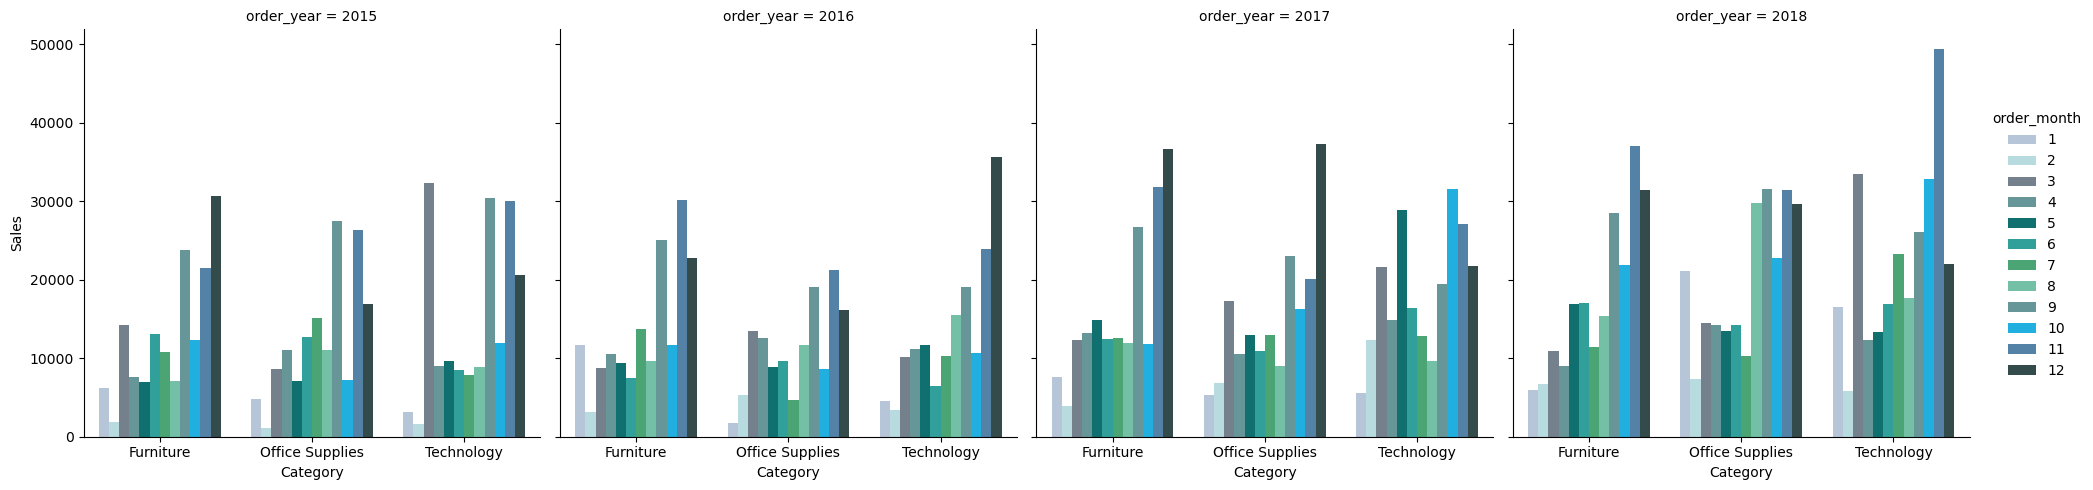

In [49]:
plt.figure(figsize=(8, 6))
sale = df.groupby(['order_year','order_month','Category']).agg({'Sales':sum}).reset_index()
sns.catplot(data = sale, kind="bar",x="Category", y="Sales",col='order_year',hue='order_month',height=5, aspect=1, palette=color_month);

**<span style="color:#790252;"> Observations : <br>
    1. As you observed in every year most profit related to Furniture happened in the month of 9,11,12 i.e., Sept,Nov,Dec resp.<br>
	2. Whereas in each year in the month of 9 and 11 most of the sales profit done from the Office Supplies category products but only in year 2017 Dec also included in this profitable month<br>
	3. But regarting to Technological products its varies in every year but overall we can say that in the 1st quarter of the year month 3 and in 3rd quarter month 9 and whole 4th quarter of the year are more favourable of the sales<br>
</span>**

### Region segregated Category wise distribution of Sales

<Figure size 800x600 with 0 Axes>

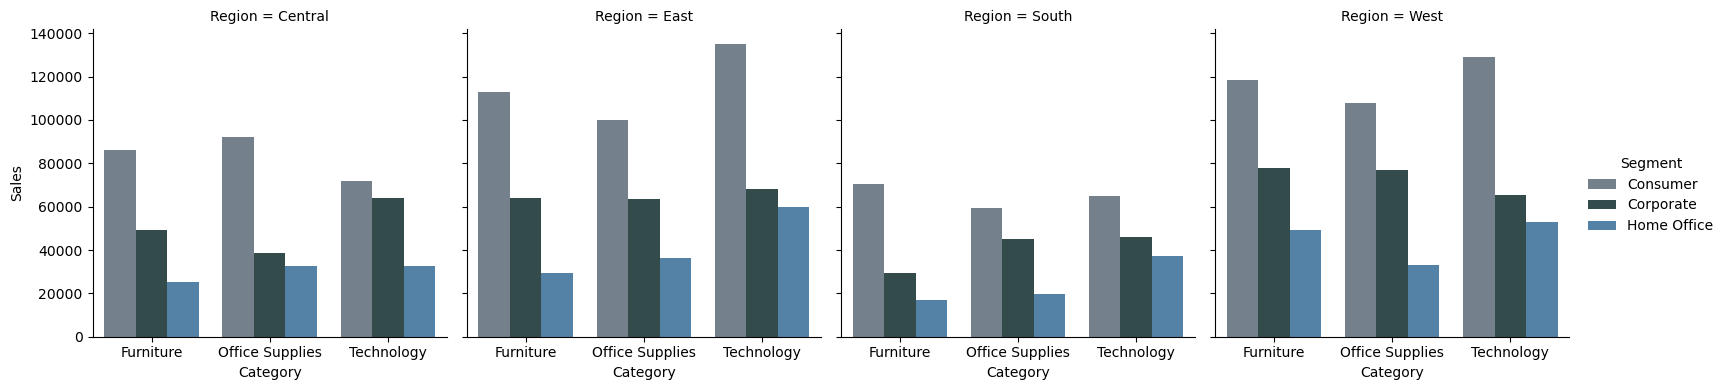

In [50]:
plt.figure(figsize=(8, 6))
sale = df.groupby(['Region','Category','Segment']).agg({'Sales':sum}).reset_index()
sns.catplot(data = sale, kind="bar",x="Category", y="Sales", col="Region",hue='Segment',height=4, aspect=1, palette=color_list[0:3]);

**<span style="color:#790252;"> Observations : <br>
    1. As you can see the Consumer were responsible for most of the sales of each product category in every region.<br>
	2. The sales of technological products is highest in the western and eastern regions, followed by furniture then office Supplies.<br>
	3. Whereas in Central and Southern region sales of Furniture and office Supplies are more tha the Technological products.<br>
</span>**

### Correlation between the features

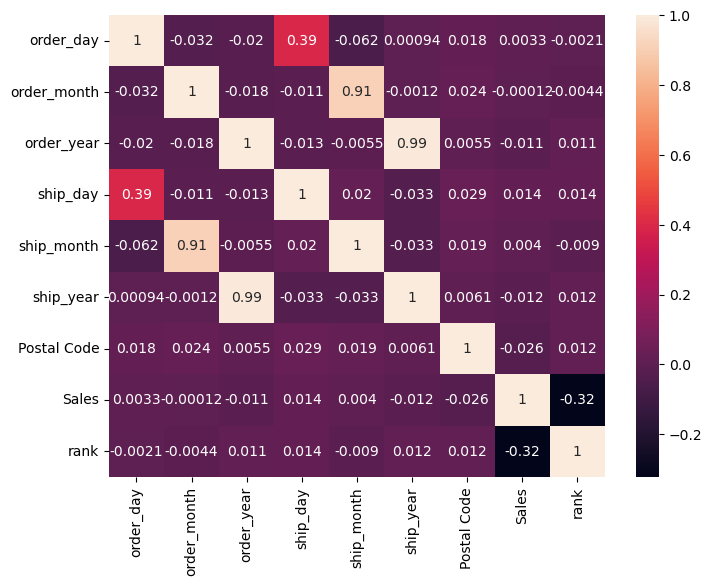

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True);

**<span style="color:#790252;"> Observations : <br>
    The highest correlation is between the order year and shipping year followed by the order month and shipping month which may the signified that the delay rate of shipping is much less<br></span>**

### Time Series Analysis

In [54]:
regions = df['Region'].unique()
shipModes = df['Ship Mode'].unique()
categories = df['Category'].unique()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


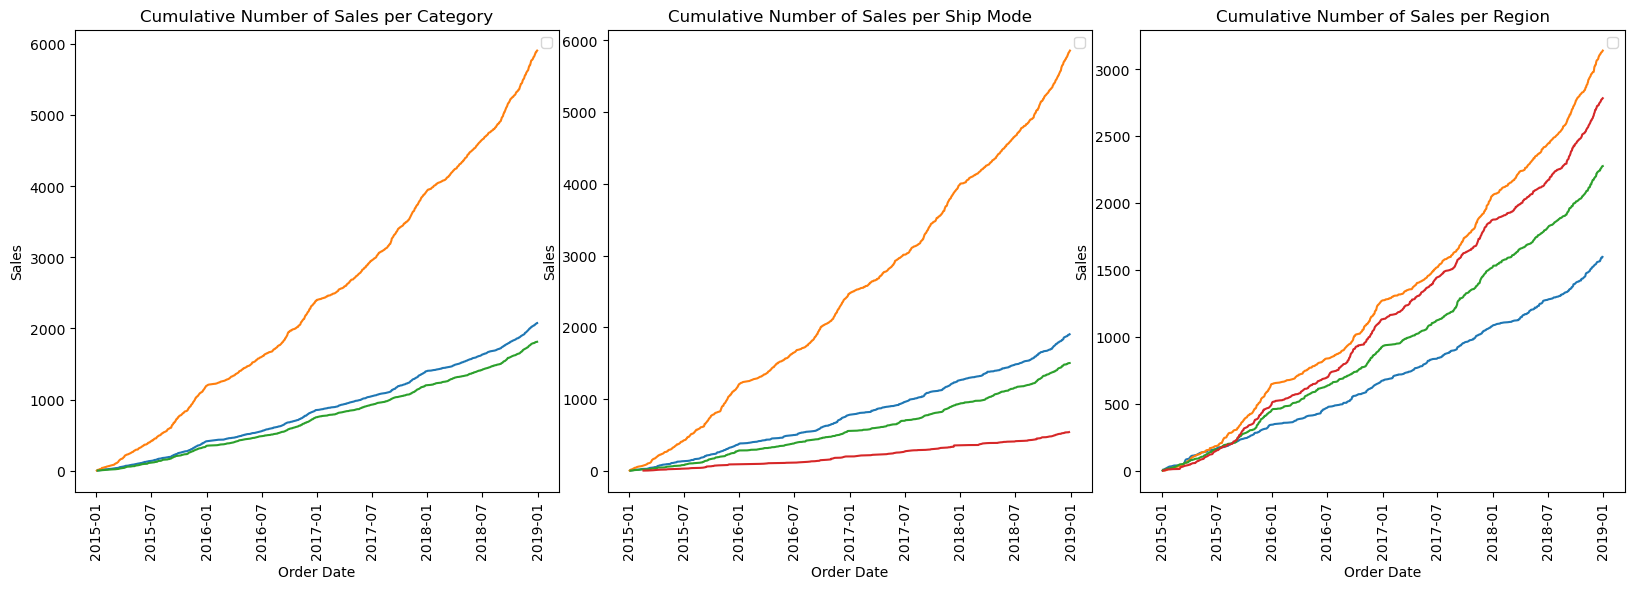

In [56]:
plt.figure(5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.1);
#graphing 'Sales' vs. 'Category'
dfbyCatOrderDate = df.groupby(['Category','Order Date'])
plt.subplot(131).title.set_text('Cumulative Number of Sales per Category')
plt.xticks(rotation=90) 
plt.legend()
for cat in categories:
    data = dfbyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))

#graphing 'Sales' vs. 'Ship Mode'
dfbyShipOrderDate = df.groupby(['Ship Mode','Order Date'])
plt.subplot(132).title.set_text('Cumulative Number of Sales per Ship Mode')
plt.xticks(rotation=90)
plt.legend()
for shipMode in shipModes:
    data = dfbyShipOrderDate['Sales'].count()[shipMode]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(132))
    
#graphing 'Sales' vs. 'Region'
dfbyRegionOrderDate = df.groupby(['Region','Order Date'])
plt.subplot(133).title.set_text('Cumulative Number of Sales per Region')
plt.xticks(rotation=90)
plt.legend()
for region in regions:
    data = dfbyRegionOrderDate['Sales'].count()[region]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(133))

**<span style="color:#790252;"> Observations : <br>
    As year passes sales are increasing<br></span>**

# **<span style="color:#094074;">Conclusions from Data Visualization</span>**

> We can say that more profitable region is West and East whereas New york and California having highest profitable states.

> And in terms of the Product Category Technology is highest but Furniture and Office Supplier are also good there are so many demand in all these product category

> And in terms of the month the 9,11,12 are most preferable month maybe due to festive season or holidays

